# Satisfação de passageiros em vôos de companhia aérea
---
## Contexto

Projeto apresentado no módulo de Machine Learning I do curso de Ciência de Dados pelo programa [Santander Coders](https://letscode.com.br/processos-seletivos/santander-coders?_gl=1*64jvis*_ga*MTc0MTY2OTM5Ni4xNjg3ODM0MDg3*_ga_6K6NJK2FV3*MTY4NzgzNDA4Ny4xLjEuMTY4NzgzNDE3Mi4wLjAuMA..), ministrado pela [Ada](https://ada.tech/), sob orientação do professor [Thiago Marto](https://www.linkedin.com/in/tiagosmrm/).

Os integrantes do grupo são:

- Cátia
- [Eduardo Acrani](https://www.linkedin.com/in/eduardo-acrani-ruivo-0219041b7/)
- [Jadhy Lima](https://www.linkedin.com/in/jadhy-lima/)
- [Laercio Candido](https://www.linkedin.com/in/laerciocandido/)
- [Poliana Ferreira](https://www.linkedin.com/in/poliana-nascimento-ferreira/)



## Introdução

Neste projeto vamos analisar dados de uma pesquisa com passageiros de companhias aéreas dos Estados Unidos e criar modelos que prevejam a satisfação deles. Será interessante se esse modelo identificar quais fatores mais influenciam na satisfação, pois pode ajudar as companhias aéreas a:
- identificar áreas de melhoria, levando em consideração os fatores que mais afetam a satisfação do passageito, a fim de aprimorar a experiência dele
- tomar decisões estratégicas para melhorar a qualidade do atendimento ao cliente
- criar campanhas mais efetivas que atendam as expectativas dos passageiros
- realizar pesquisas adicionais mais focadas nos insights extraídos da análise do problema



## Dataset

O dataset utilizado foi extraído do [Kaggle](https://www.kaggle.com/datasets/johndddddd/customer-satisfaction), e será utilizado para a identificação da satisfação dos passageiros, ou seja, um problema de classificação binária. O dataset possui xxx registros e yyy colunas, sendo:

* **id**: Número identificador de cada cliente

* **satisfaction_v2** - Nível de satisfação da companhia aérea (satisfeito / neutro or insatisfeito)

* **Gender** - Gênero dos passageiros (Feminino / Masculino)

* **Customer Type** - Tipo de cliente (Cliente leal, cliente desleal)

* **Age** - Idade dos passageiros

* **Type of Travel** - Propósito da viagem dos passageiros (Viagem pessoal, Viagem de negócios)

* **Class** - Classe de viagem no avião dos passageiros (Executiva, Econômica, Econômica Plus)

* **Flight Distance** - Distância do voo da viagem

* **Inflight wifi service** - Nível de satisfação do serviço de Wi-Fi a bordo (0 a 5)

* **Departure/Arrival time convenient** - Nível de satisfação em relação à conveniência do horário de partida/chegada (0 a 5)

* **Ease of Online booking** - Nível de satisfação da reserva online (0 a 5)

* **Gate location** - Nível de satisfação da localização do portão de embarque (0 a 5)

* **Food and drink** - Nível de satisfação da comida e bebida (0 a 5)

* **Online boarding** - Nível de satisfação do embarque online (0 a 5)

* **Seat comfort** - Nível de satisfação do conforto do assento (0 a 5)

* **Inflight entertainment** - Nível de satisfação do entretenimento a bordo (0 a 5)

* **On-board service** - Nível de satisfação do serviço a bordo (0 a 5)

* **Leg room service** - Nível de satisfação do serviço de espaço para as pernas (0 a 5)

* **Baggage handling** - Nível de satisfação do manuseio de bagagem (1 a 5)

* **Check-in service** - Nível de satisfação do serviço de check-in (0 a 5)

* **Inflight service** - Nível de satisfação do serviço a bordo (0 a 5)

* **Cleanliness** - Nível de satisfação da limpeza (0 a 5)

* **Departure Delay in Minutes** - Minutos de atraso na partida

* **Arrival Delay in Minutes** - Minutos de atraso na chegada



In [20]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Importando os dados

df = pd.read_excel("/content/satisfaction.xlsx")
df.to_csv("/content/satisfaction.csv", index=False)
df = pd.read_csv("/content/satisfaction.csv")
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


A coluna `id` indica apenas o identificador do cliente, de modo que é irrelevante para as análises do modelo. Sendo assim, iremos excluí-la.

In [22]:
df[df.isna().any(axis=1)]

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
145,61021,satisfied,Female,Loyal Customer,21,Personal Travel,Eco,4804,0,2,...,5,5,4,1,4,2,3,5,20,NaN
246,40480,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,1364,0,3,...,4,2,1,1,3,4,3,2,0,NaN
710,19597,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,1792,0,5,...,5,5,4,4,5,3,4,5,24,NaN
736,5411,satisfied,Male,Loyal Customer,9,Personal Travel,Eco,1862,0,5,...,3,3,5,3,4,4,4,3,0,NaN
818,3711,neutral or dissatisfied,Male,Loyal Customer,9,Personal Travel,Eco,1668,1,0,...,4,4,4,5,1,5,1,4,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127739,40434,satisfied,Male,Loyal Customer,44,Business travel,Business,3431,2,2,...,4,5,5,5,5,5,5,4,70,NaN
128131,120101,satisfied,Male,Loyal Customer,39,Business travel,Business,1595,4,4,...,5,5,5,5,5,3,5,5,0,NaN
128710,45676,satisfied,Female,Loyal Customer,45,Business travel,Eco,871,5,1,...,2,5,5,5,5,1,5,5,100,NaN
129774,44820,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,1594,5,4,...,3,3,1,4,3,3,4,3,0,NaN


In [23]:
df[df["Arrival Delay in Minutes"] == 0]

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,100744,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,...,2,2,5,4,5,5,4,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129869,80330,satisfied,Female,disloyal Customer,55,Personal Travel,Eco,1953,5,2,...,5,1,1,1,3,3,4,1,0,0.0
129871,91851,satisfied,Female,disloyal Customer,35,Personal Travel,Eco,3287,5,4,...,2,2,4,5,4,4,3,2,9,0.0
129872,41573,satisfied,Female,disloyal Customer,69,Personal Travel,Eco,2240,5,4,...,4,4,5,4,4,3,4,4,4,0.0
129874,53969,satisfied,Female,disloyal Customer,11,Personal Travel,Eco,2752,5,5,...,2,2,3,5,3,5,4,2,5,0.0


<Axes: >

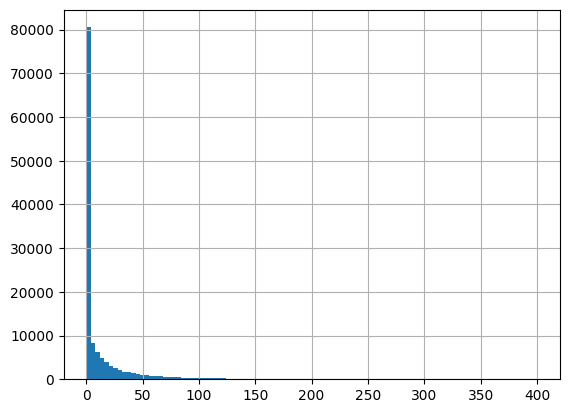

In [24]:
df["Arrival Delay in Minutes"].hist(range=[0,400], bins=100)

# OBS Dropar id só mais tarde pra poder analisar antes

In [25]:
df.drop(['id'], axis=1, inplace=True)

Vamos verificar o comportamentos das variáveis no dataset, em relação ao tipo, quantidades de observações não nulas e se há dados duplicados, para evitar os problemas de vazamento de dados, que pode comprometer o modelo



In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction_v2                    129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [27]:
# checando dados duplicados
df.duplicated().sum()

0

In [28]:
# verificando dados nulos
df.isnull().sum()

satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

O dataset tem 23 colunas e 129880 linhas, sem duplicatas de dados. A variável `Arrival Delay in Minutes` tem dados faltantes, o que exige um tratamento prévio de input de dados.

# OBS: Vamos tirar essa linha com dados faltantes?
# OBS Porque que o arrival delay nao tem dados? o vôo nao chegou? Porque só ela nao tem dados?

Observamos que o dataset contem variáveis categóricas e numéricas, divididas em:

* **categóricas**: `satisfaction_v2`, `Gender`, `Customer Type`, `Type of Travel` e `Class`
* **numéricas**: `Age`, `Flight Distance`, `Inflight wifi service`, `Departure/Arrival time convenient`, `Ease of Online booking`, `Gate location`,
`Food and drink`,`Online boarding`,`Seat comfort`, `Inflight entertainment`,
`On-board service`, `Leg room service`, `Baggage handling`, `Checkin service`,
`Inflight service`, `Cleanliness`, `Departure Delay in Minutes`, `Arrival Delay in Minutes`



Vamos ver quantas observações há nas variáveis categóricas:

In [29]:
for column in ["satisfaction_v2", "Gender", "Customer Type","Type of Travel", "Class"]:
    print(f"Coluna: {column}")
    print(df[column].value_counts(normalize=True) * 100)
    print(f'\n{"="*80}\n')

Coluna: satisfaction_v2
satisfied                  54.73283
neutral or dissatisfied    45.26717
Name: satisfaction_v2, dtype: float64


Coluna: Gender
Female    50.738374
Male      49.261626
Name: Gender, dtype: float64


Coluna: Customer Type
Loyal Customer       81.690791
disloyal Customer    18.309209
Name: Customer Type, dtype: float64


Coluna: Type of Travel
Business travel    69.058362
Personal Travel    30.941638
Name: Type of Travel, dtype: float64


Coluna: Class
Business    47.859563
Eco         44.894518
Eco Plus     7.245919
Name: Class, dtype: float64




É importante observar que as colunas `Customer Type`, `Type of Travel` e `Class`estão desbalanceadas. Isso exige que tratemos o problema adequadamente para avaliar a qualidade preditiva dos modelos.

# OBS: Tratar as variaveis desbalanceadas

Para simplificar a análise exploratória e identificar padrões e relacionamentos vamos transformar as variáveis categóricas em variáveis numéricas

In [30]:
# tranformando as variáveis categóricas em numéricas

df['satisfaction_v2'] = df['satisfaction_v2'].map({'neutral or dissatisfied': 0, 'satisfied': 1})
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})   # isso faz sentido????
df['Customer Type'] = df['Customer Type'].map({'disloyal Customer': 0, 'Loyal Customer': 1})
df['Type of Travel'] = df['Type of Travel'].map({'Business travel': 0, 'Personal Travel': 1})
df = pd.get_dummies(df, columns=['Class'], drop_first=True)
df

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Eco,Class_Eco Plus
0,1,0,1,65,1,265,0,0,0,2,...,3,0,3,5,3,2,0,0.0,1,0
1,1,1,1,47,1,2464,0,0,0,3,...,4,4,4,2,3,2,310,305.0,0,0
2,1,0,1,15,1,2138,0,0,0,3,...,3,3,4,4,4,2,0,0.0,1,0
3,1,0,1,60,1,623,0,0,0,3,...,1,0,1,4,1,3,0,0.0,1,0
4,1,0,1,70,1,354,0,0,0,3,...,2,0,2,4,2,5,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,0,29,1,1731,5,5,5,3,...,3,3,4,4,4,2,0,0.0,1,0
129876,0,1,0,63,1,2087,2,3,2,4,...,2,3,3,1,2,1,174,172.0,0,0
129877,0,1,0,69,1,2320,3,0,3,3,...,4,3,4,2,3,2,155,163.0,1,0
129878,0,1,0,66,1,2450,3,2,3,2,...,3,2,3,2,1,2,193,205.0,1,0


Vamos ver como as variáveis se comportam em relação a estatísticas descritivas

In [31]:
# obtendo estatísticas descritivas

df.describe()

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Eco,Class_Eco Plus
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000
mean,0.547328,0.492616,0.816908,39.427957,0.309416,1981.409055,2.838597,2.990645,2.851994,2.990422,...,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129,0.448945,0.072459
std,0.497757,0.499947,0.386743,15.119360,0.462255,1027.115606,1.392983,1.527224,1.443729,1.305970,...,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650,0.497388,0.259248
min,0.000000,0.000000,0.000000,7.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,27.000000,0.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,40.000000,0.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,51.000000,1.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,85.000000,1.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000,1.000000


As variáveis aparentam ter um comportamento esperado, sem inconsistências de valores.

Vamos plotar alguns histogramas para entender se as variáveis numéricas apresentam outliers

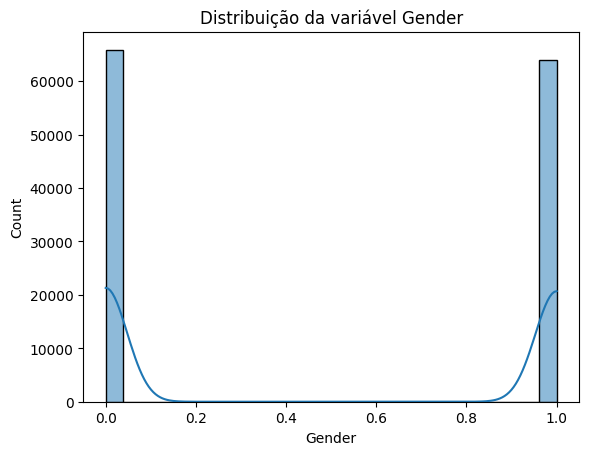

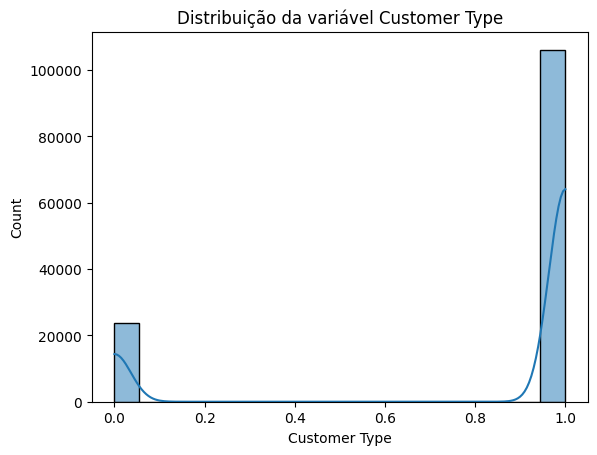

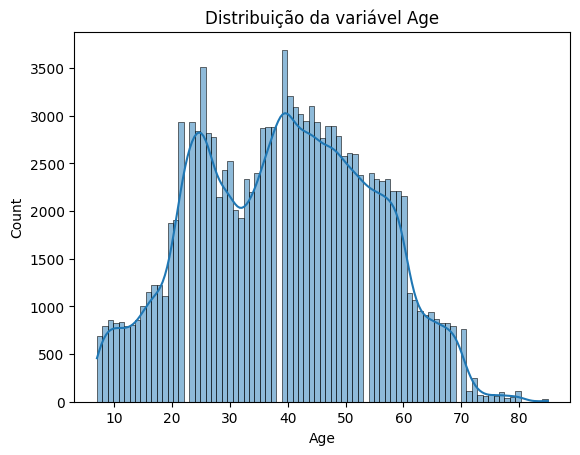

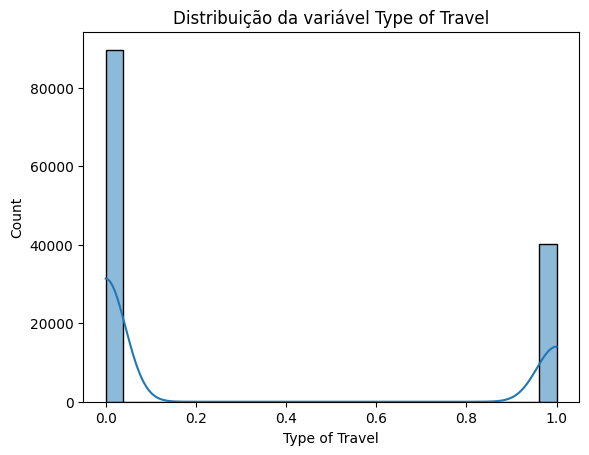

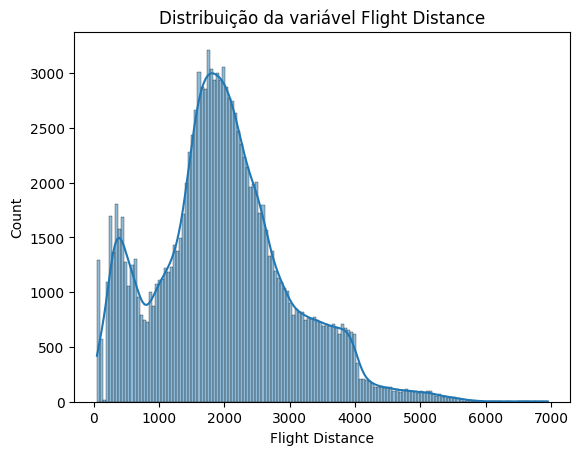

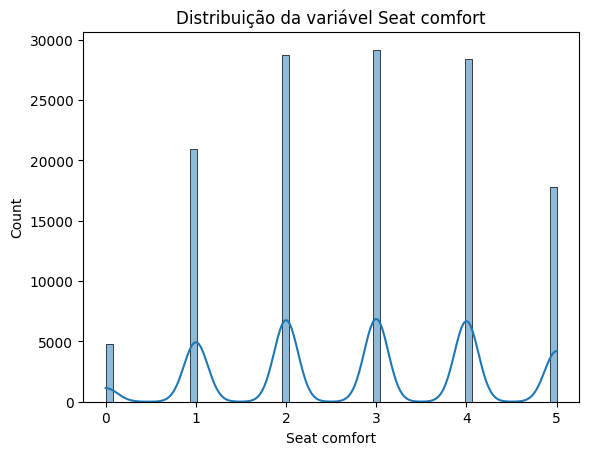

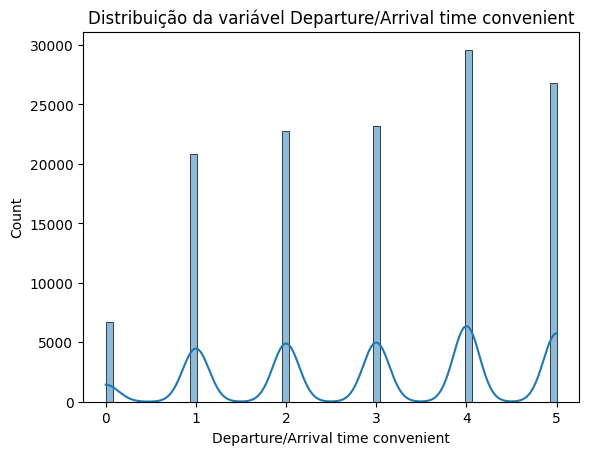

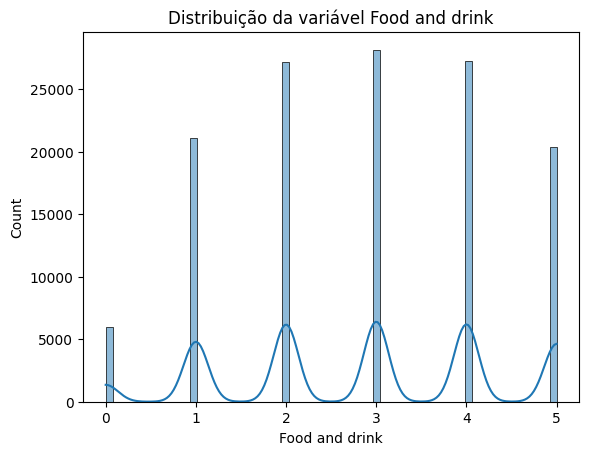

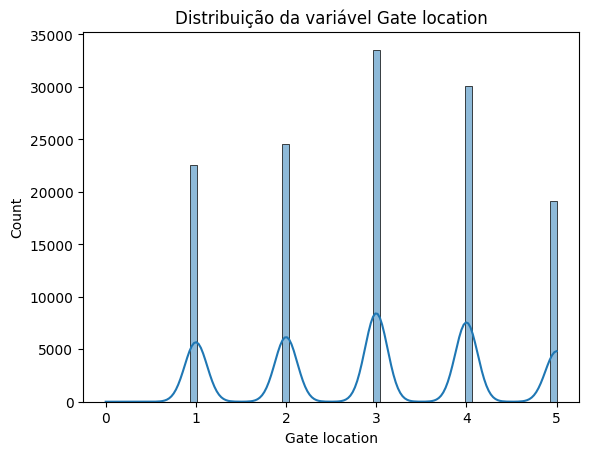

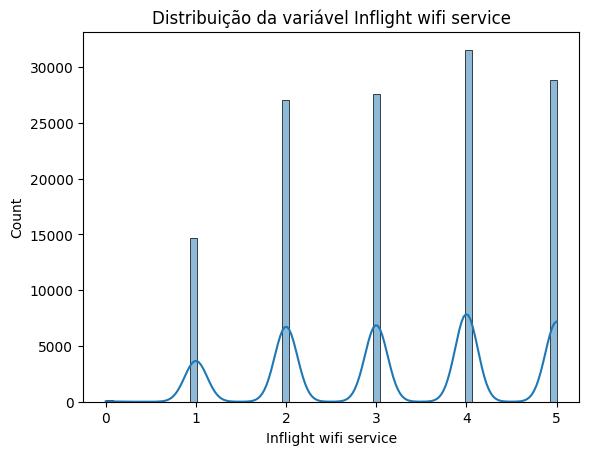

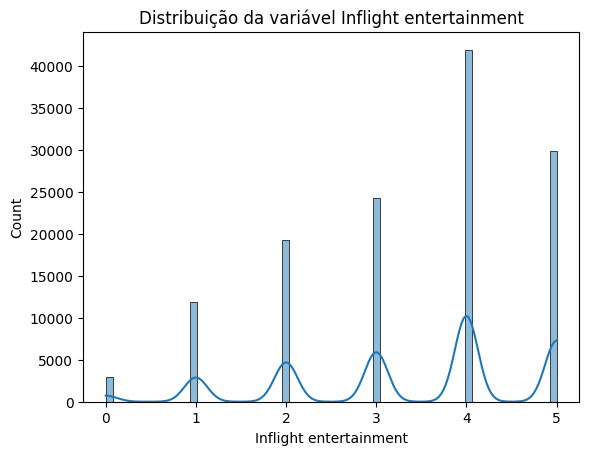

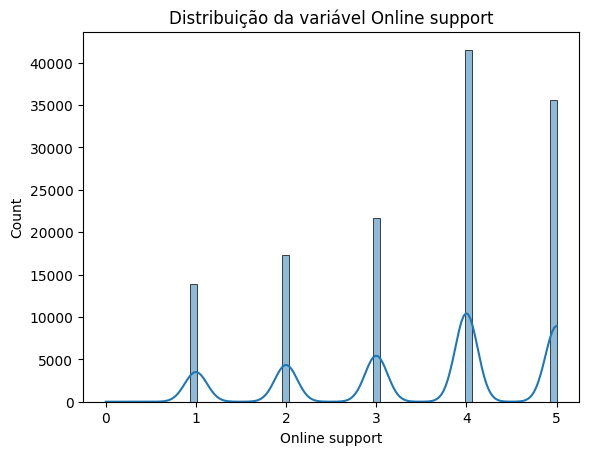

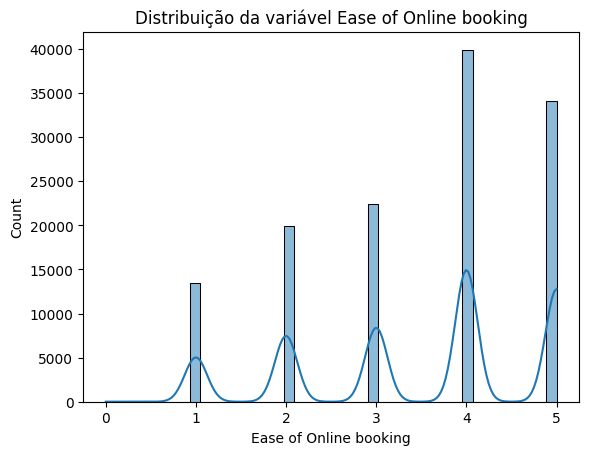

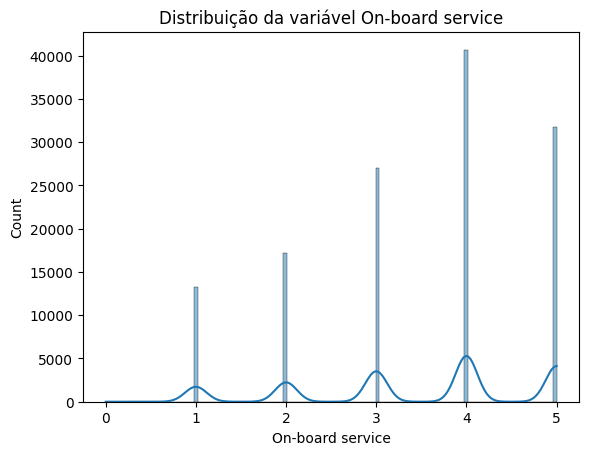

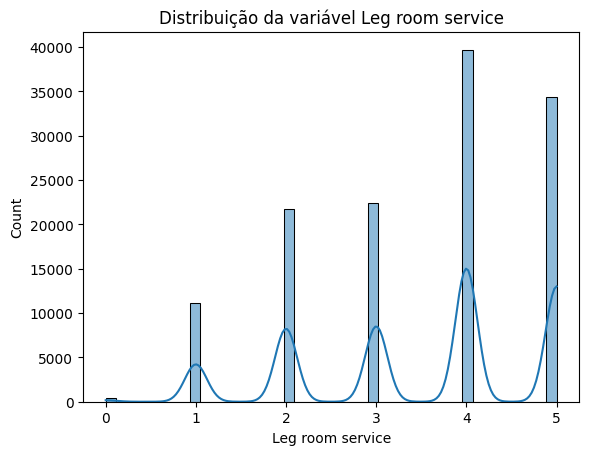

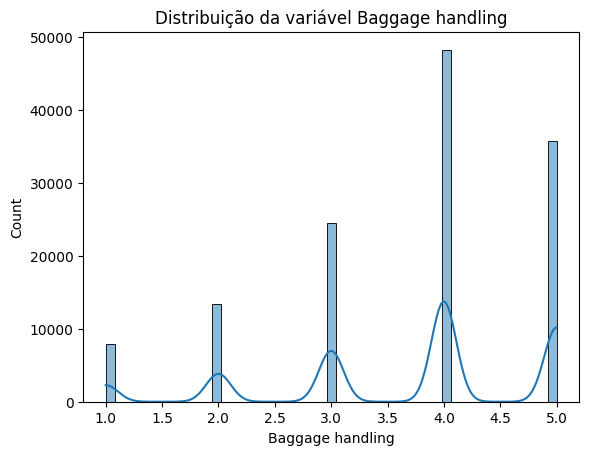

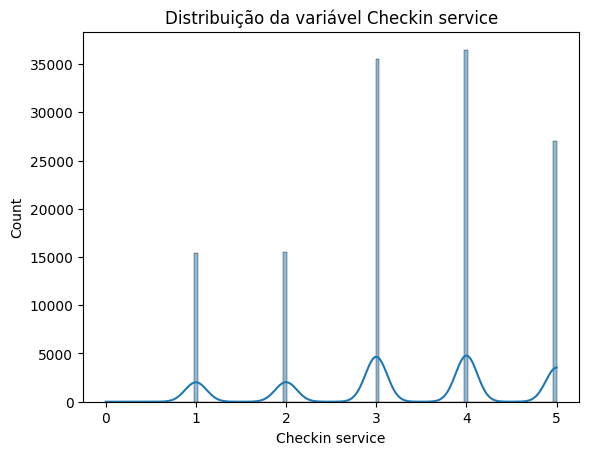

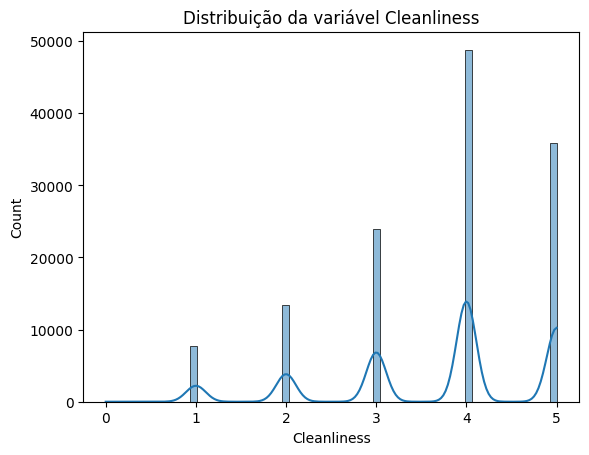

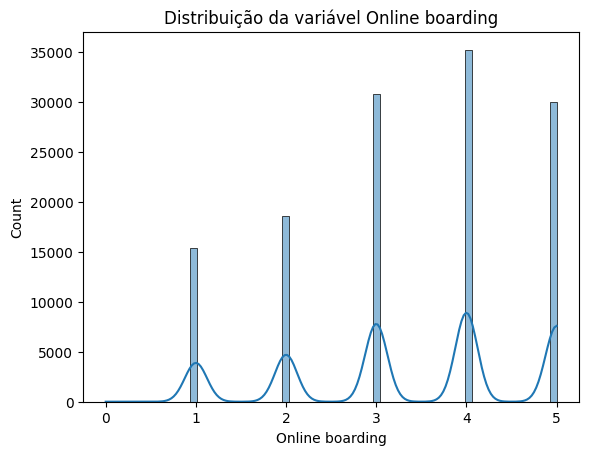

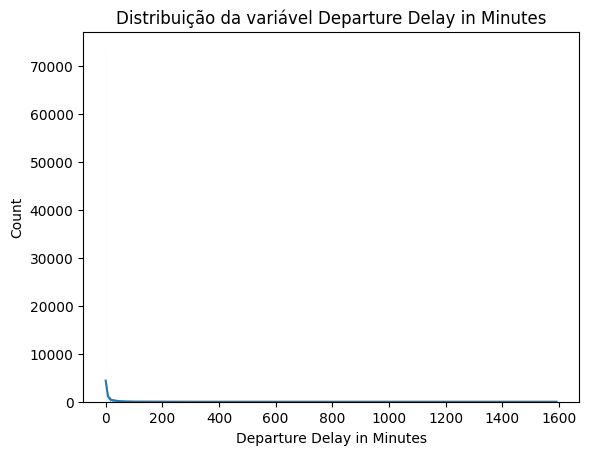

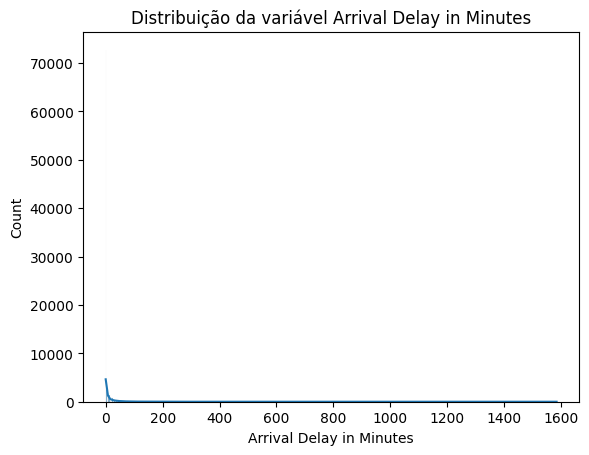

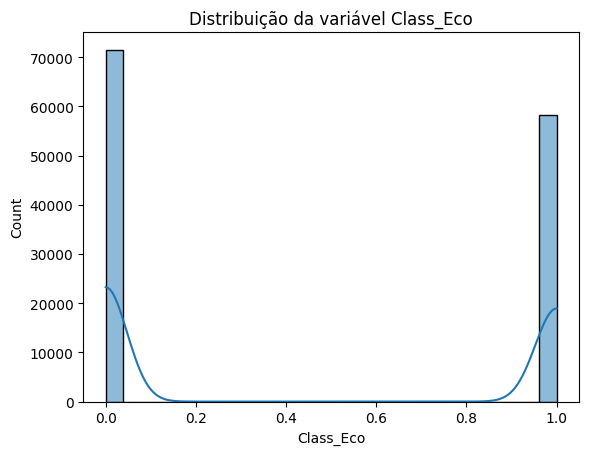

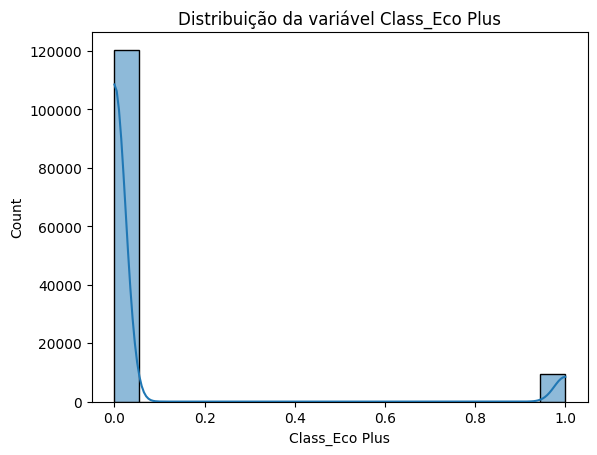

In [32]:
# visualizando distribuições com histogramas

for col in df.drop(columns="satisfaction_v2"):

    sns.histplot(data=df, x=col, kde=True).set_title(f"Distribuição da variável {col}")
    plt.show()

In [33]:
## Método: |z| > 3.

for col in df.drop(columns="satisfaction_v2"):

    mu = df[col].mean()
    std = df[col].std()

    # será outlier se |z| > 3
    aux_outliers = df[col].apply(lambda x : (x - mu)/std).apply(lambda x : np.abs(x) > 3)

    indices_outliers = aux_outliers[aux_outliers].index.tolist()

    if len(indices_outliers) >= 1:

        print(f"A coluna {col} tem {len(indices_outliers)} outliers!")
        print("\nOs índices deles são:\n")
        print(indices_outliers)

    else:

        print(f"A coluna {col} não tem outliers!")

    print(f'\n{"="*80}\n')


A coluna Gender não tem outliers!


A coluna Customer Type não tem outliers!


A coluna Age tem 25 outliers!

Os índices deles são:

[41656, 46730, 46731, 48038, 51953, 54392, 54393, 56233, 59138, 61283, 67916, 71997, 77827, 78190, 78555, 83987, 84689, 87364, 88349, 89007, 92300, 96624, 111268, 112366, 121513]


A coluna Type of Travel não tem outliers!


A coluna Flight Distance tem 830 outliers!

Os índices deles são:

[540, 588, 1160, 1161, 1664, 2859, 5885, 5886, 7630, 9071, 9613, 9614, 12861, 12862, 12863, 15497, 16386, 18607, 20439, 20628, 21586, 22092, 22692, 24382, 27712, 28522, 29894, 31462, 31934, 32188, 32805, 33326, 34157, 35567, 36443, 36549, 39838, 40242, 43385, 44264, 46077, 46368, 46734, 49083, 50310, 51557, 52143, 52715, 53482, 53833, 57233, 60701, 61958, 63597, 63697, 64194, 64452, 64539, 64681, 65309, 65313, 65370, 65380, 65775, 65891, 66015, 66073, 66199, 66429, 66493, 66743, 66746, 66749, 66779, 66810, 66846, 66870, 66930, 66991, 66993, 67092, 67122, 67130, 67132, 

# OBS: Aqui precisamos decidir se vamos retirar os outliers e que método vamos usar

Agora veremos a correlação entre as variáveis e, principalmente, como elas se relacionam com a variável que mede a satisfação dos clientes

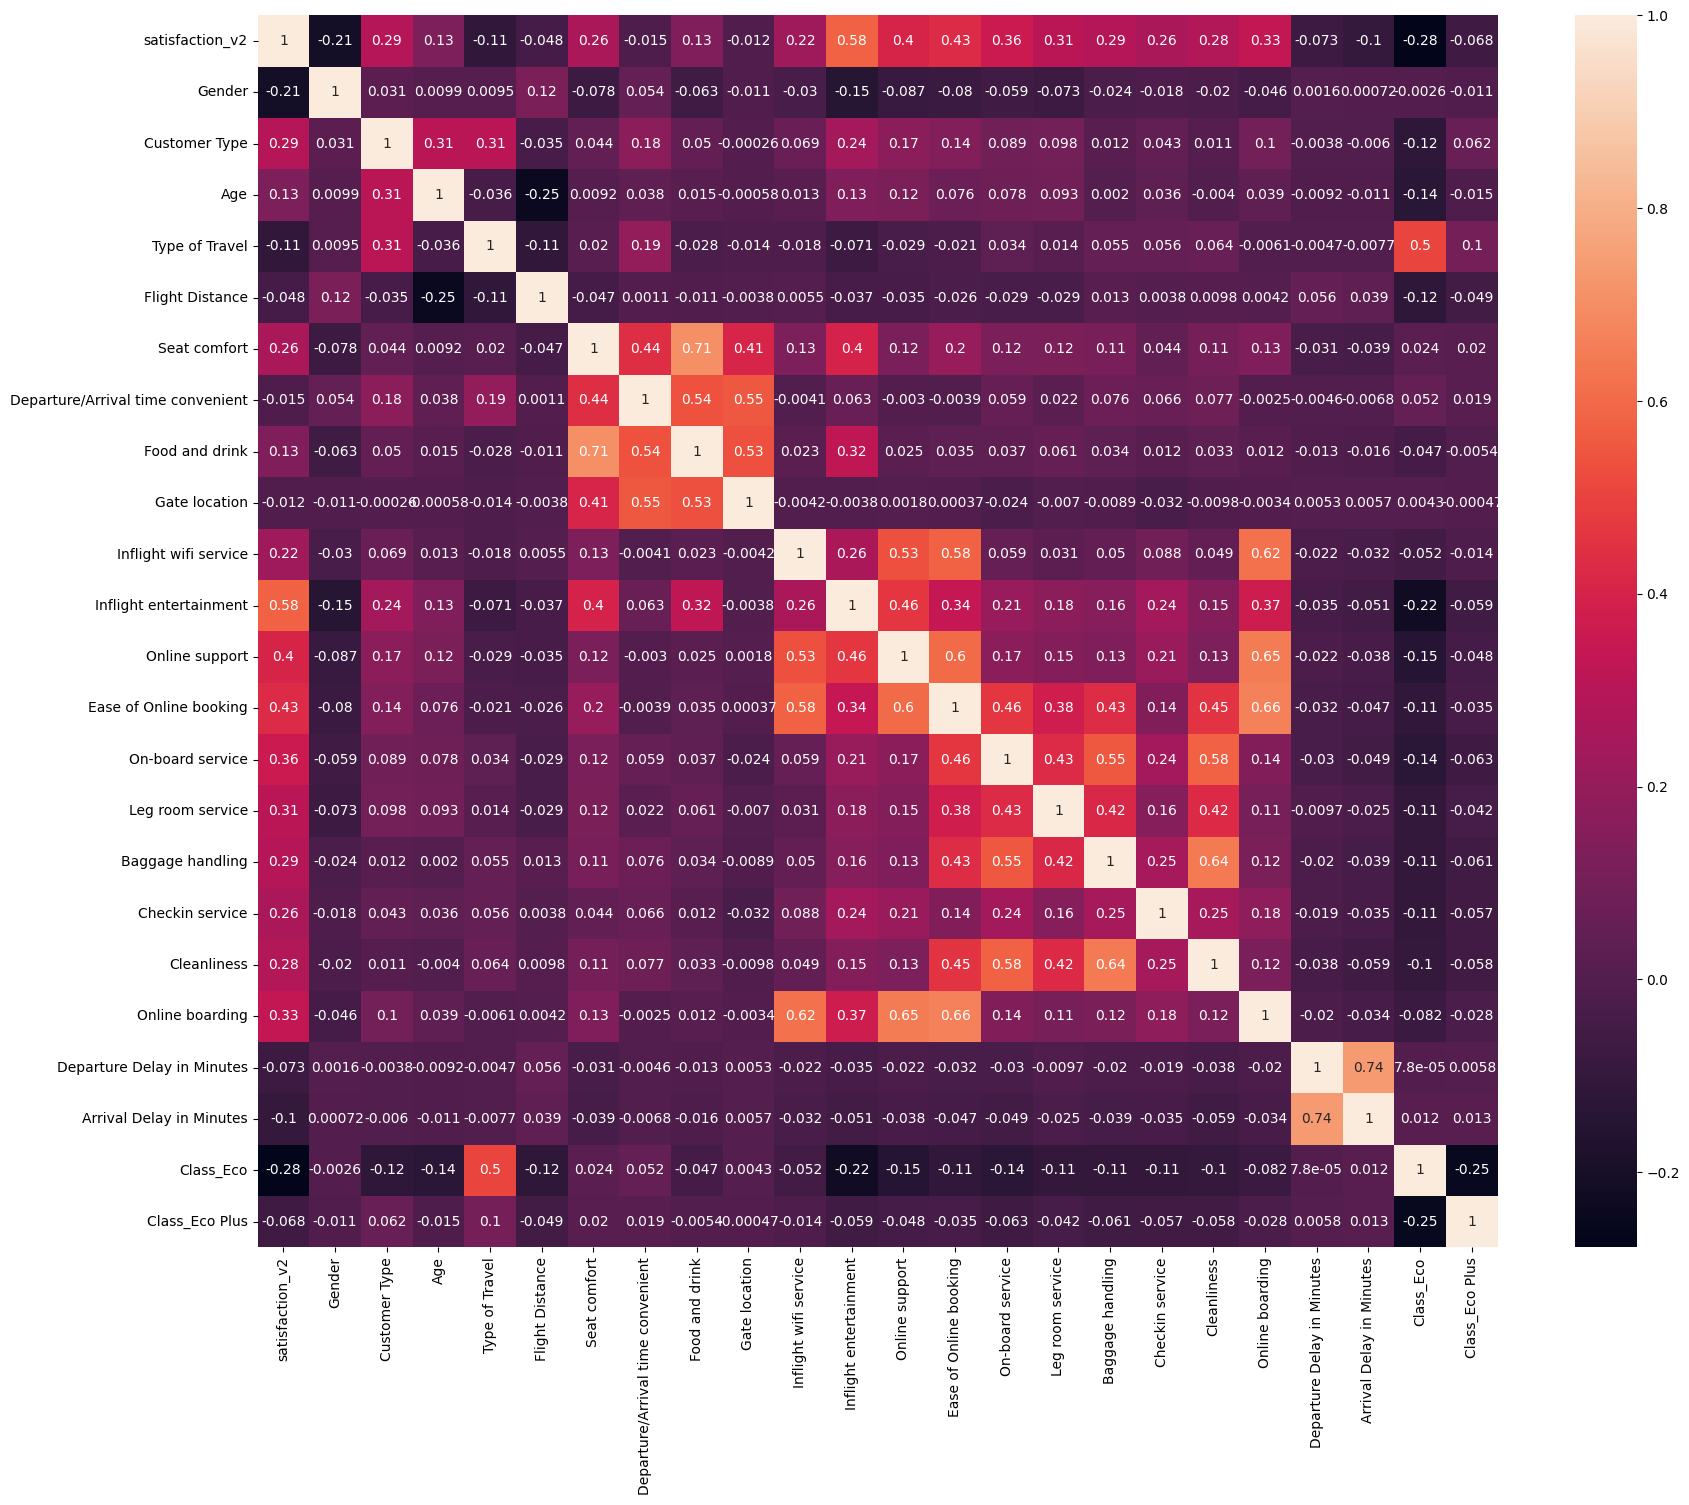

In [34]:
plt.figure(figsize=(20, 16))

sns.heatmap(df.corr(method="spearman"), annot=True);

In [35]:
df.corr()['satisfaction_v2'].sort_values(ascending=False)

satisfaction_v2                      1.000000
Inflight entertainment               0.523496
Ease of Online booking               0.431772
Online support                       0.390143
On-board service                     0.352047
Online boarding                      0.338147
Leg room service                     0.304928
Customer Type                        0.292592
Checkin service                      0.266179
Baggage handling                     0.260347
Cleanliness                          0.259330
Seat comfort                         0.242384
Inflight wifi service                0.227062
Food and drink                       0.120677
Age                                  0.117971
Gate location                       -0.012071
Departure/Arrival time convenient   -0.015507
Flight Distance                     -0.039224
Class_Eco Plus                      -0.067537
Departure Delay in Minutes          -0.073909
Arrival Delay in Minutes            -0.080691
Type of Travel                    